<a href="https://colab.research.google.com/github/iMan0405/Portfolio_DT_vs_AI/blob/main/a_model_that_detects_dead_and_green_leaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from fastai.vision.all import *
from ipywidgets import widgets

In [33]:
path = Path('/content/drive/MyDrive/dry and green leaf dataset')
path.ls()
fls = get_image_files(path)
fls

(#1857) [Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/image10.jpeg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images267.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images180.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images238.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images100.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images230.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images120.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images70.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images69.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images50.jpg')...]

In [34]:
failed = verify_images(path)
failed

'PosixPath' object is not iterable


(#0) []

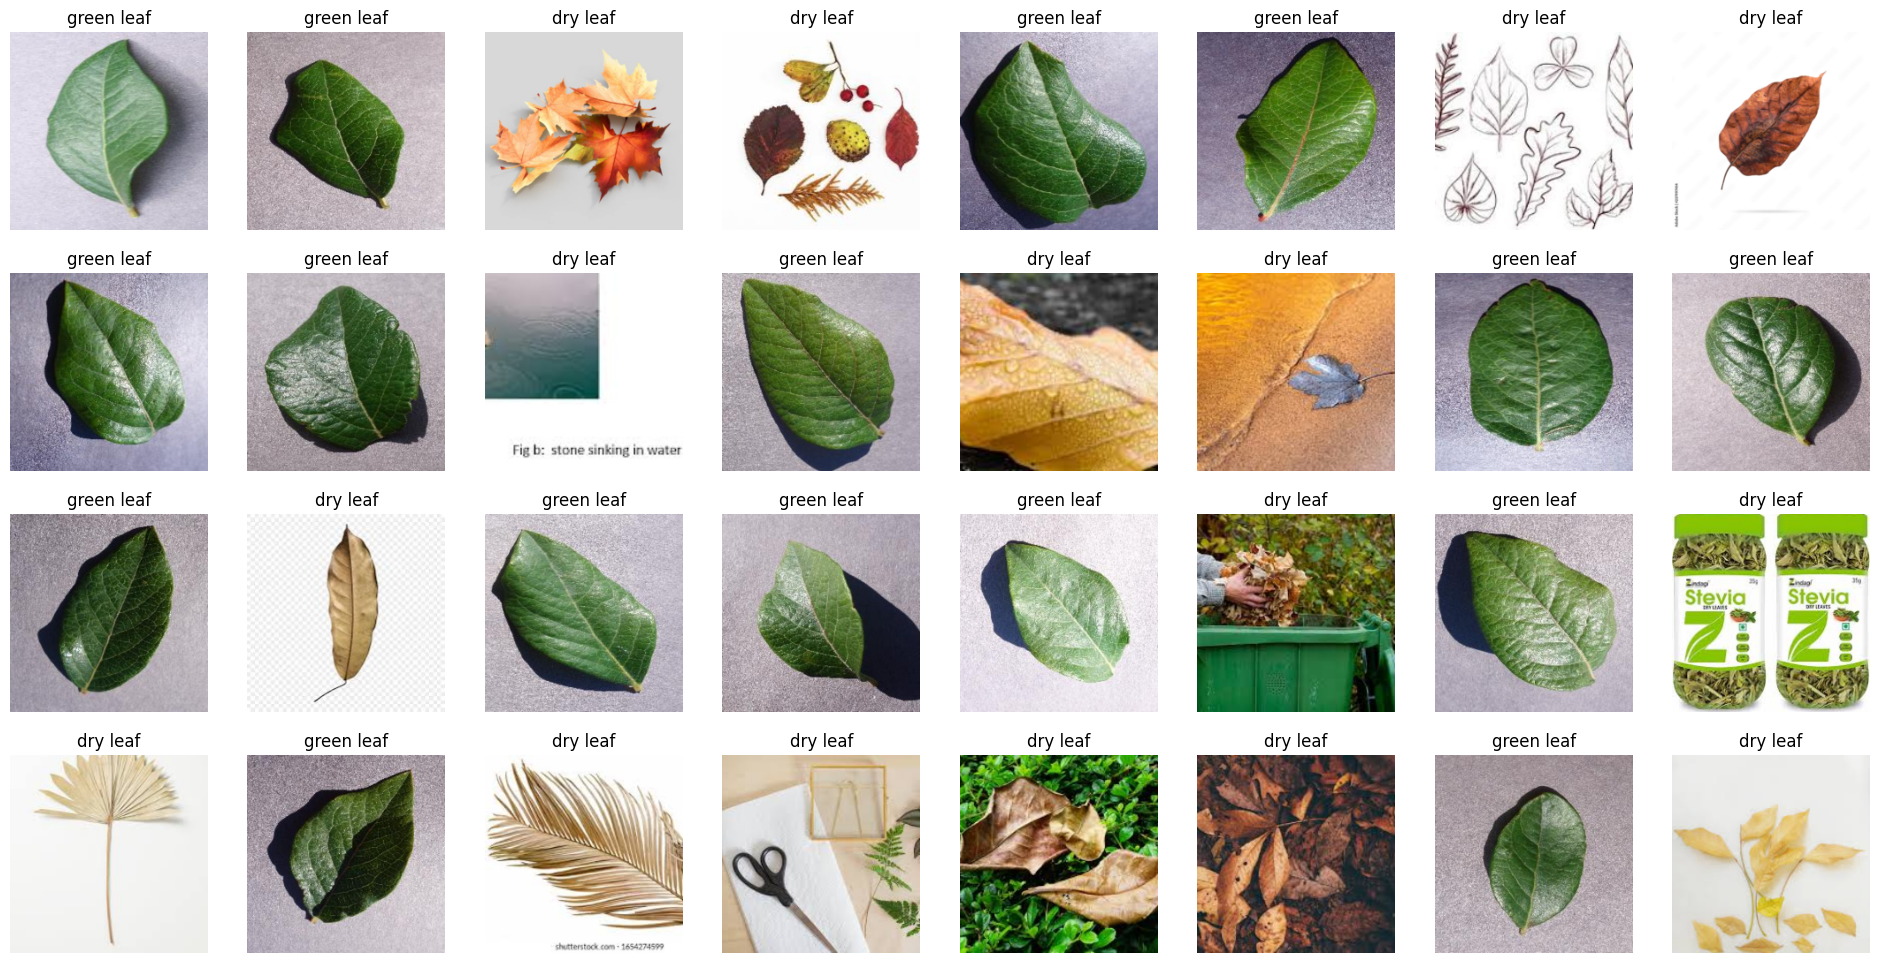

In [36]:
#DataBlock yaratamiz
person_nature = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

#Dataloader yaratamiz
dls = person_nature.dataloaders(path)

#Datasetni tekshiramiz

dls.train.show_batch(max_n=32, nrows=4)

In [37]:
#Train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

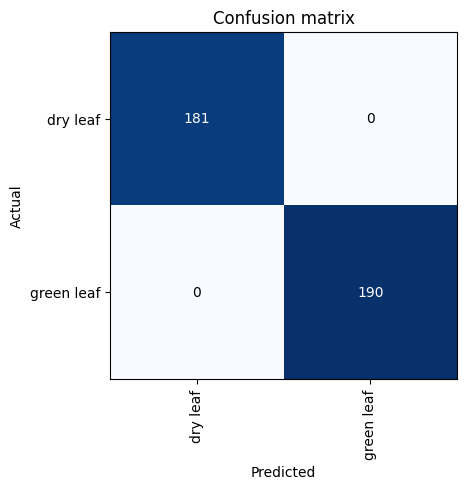

In [38]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

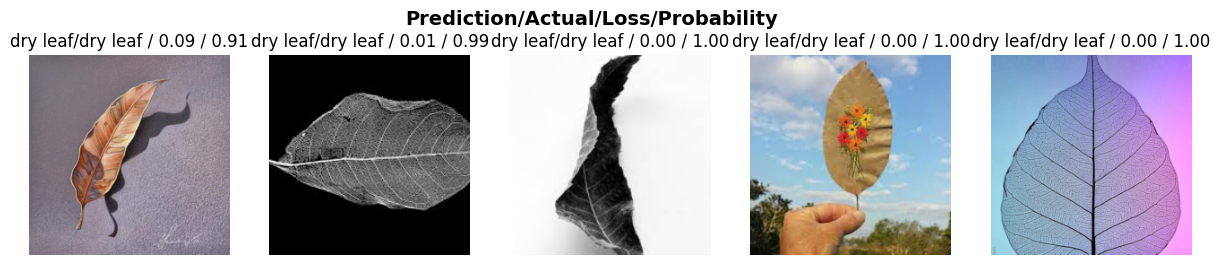

In [39]:
interp.plot_top_losses(5, nrows=1)

In [40]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

bashorat: Yashil barg
 Ushbu o'simlikning holati yaxshi )).
aniqlilik darajasi: 99.9%


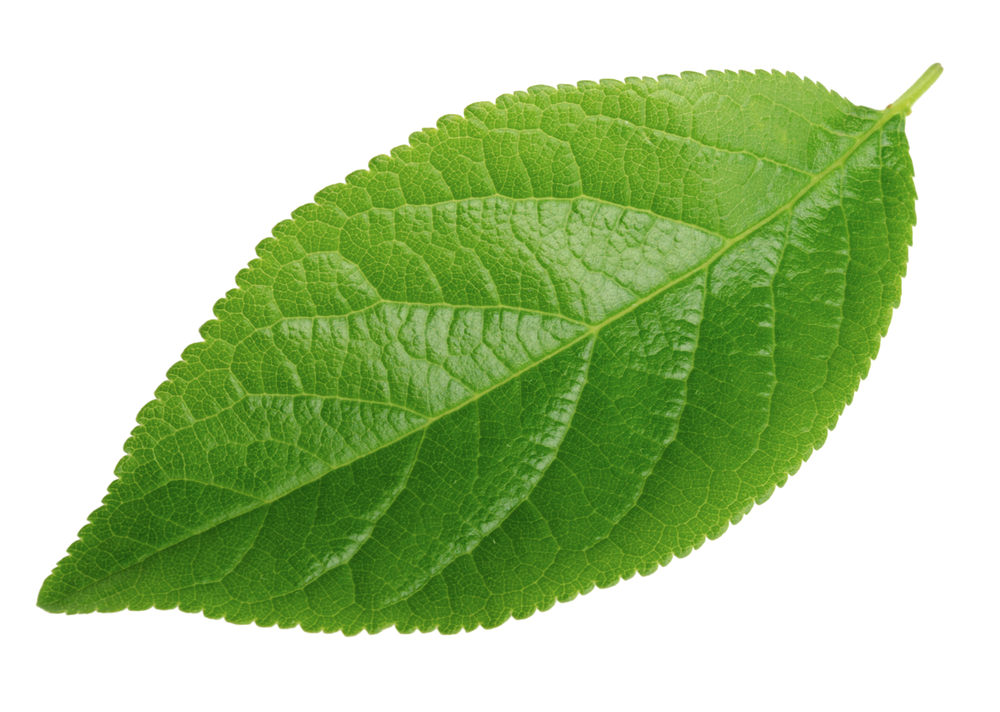

In [42]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
if pred == 'dry leaf':
  print(f"bashorat: Qurigan barg\n Ushbu o'simlikka suv qo'yishingiz lozim.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
elif pred == 'green leaf':
  print(f"bashorat: Yashil barg\n Ushbu o'simlikning holati yaxshi )).")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
else:
  print('No Data')
img

In [43]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

bashorat: Qurigan barg
 Ushbu o'simlikka suv qo'yishingiz lozim.
aniqlilik darajasi: 100.0%


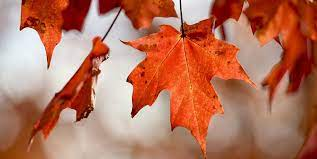

In [44]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
if pred == 'dry leaf':
  print(f"bashorat: Qurigan barg\n Ushbu o'simlikka suv qo'yishingiz lozim.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
elif pred == 'green leaf':
  print(f"bashorat: Yashil barg\n Ushbu o'simlikning holati yaxshi )).")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
else:
  print('No Data')
img